In [1]:
from cnn.input import (
    Dataloader,
    Dataset,
    get_list_of_patients,
    get_split_deterministic,
    get_training_augmentation,
    get_validation_augmentation,
)

import matplotlib.pyplot as plt
import random

2022-11-22 20:08:50.192847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 20:08:50.299185: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/guilherme/Downloads/git/segqnas/.venv/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-22 20:08:50.299198: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-22 20:08:50.801253: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library '

In [2]:
data_path = "spleen_dataset/data/Task09_Spleen_preprocessed/"

In [3]:
patients = get_list_of_patients(data_path)
print(patients)

['2', '3', '6', '8', '9', '10', '12', '13', '14', '16', '17', '18', '19', '20', '21', '22', '24', '25', '26', '27', '28', '29', '31', '32', '33', '38', '40', '41', '44', '45', '46', '47', '49', '52', '53', '56', '59', '60', '61', '62', '63']


In [4]:
train_patients, val_patients = get_split_deterministic(
    patients, fold=0, num_splits=5, random_state=12345
)
print(train_patients)
print(val_patients)

['12' '16' '18' '19' '2' '20' '21' '22' '24' '25' '26' '27' '28' '29' '3'
 '32' '38' '40' '41' '45' '46' '49' '52' '53' '59' '6' '60' '61' '62' '63'
 '8' '9']
['10' '13' '14' '17' '31' '33' '44' '47' '56']


In [5]:
patch_size = (128, 128, 1)
batch_size = 32

In [6]:
train_dataset = Dataset(
    data_path=data_path, patients=train_patients, only_non_empty_slices=True
)
train_augmentation = get_training_augmentation(patch_size)
train_dataloader = Dataloader(
    dataset=train_dataset,
    batch_size=batch_size,
    skip_slices=0,
    augmentation=train_augmentation,
)
print(len(train_dataloader))

26


In [7]:
val_dataset = Dataset(
    data_path=data_path, patients=val_patients, only_non_empty_slices=True
)
val_augmentation = get_validation_augmentation(patch_size)
val_dataloader = Dataloader(
    dataset=val_dataset,
    batch_size=batch_size,
    skip_slices=0,
    augmentation=val_augmentation,
)
print(len(val_dataloader))

6


(512, 512, 1)
(512, 512)


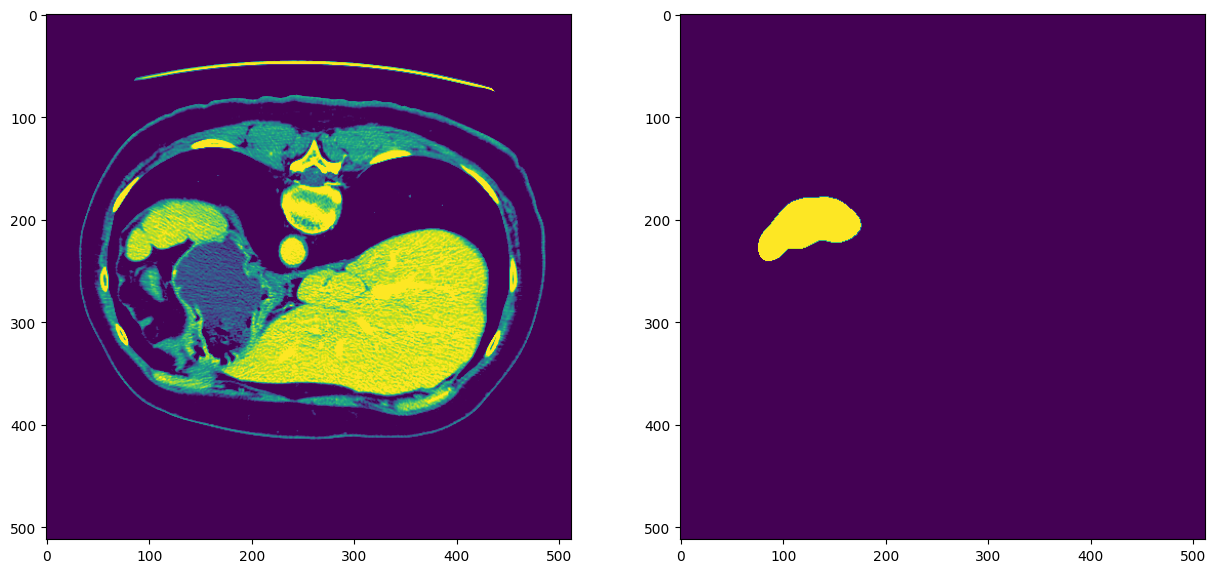

In [8]:
id = random.randint(0, len(train_dataset) - 1)
image, label = train_dataset[id]

print(image.shape)
print(label.shape)

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image)
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(label)

TypeError: Invalid shape (128, 128, 2) for image data

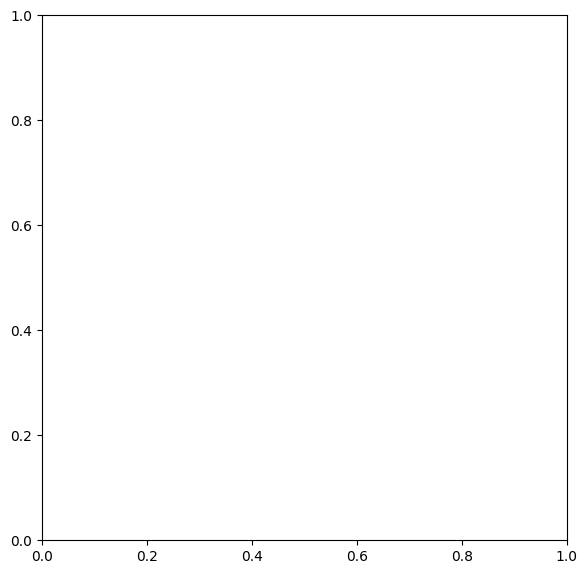

In [20]:
id = random.randint(0, len(train_dataloader) - 1)
images, labels = train_dataloader[id]

image = images[0]
label = labels[0]

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(image)
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(label)

In [10]:
data_path = "prostate_dataset/data/Task05_Prostate_preprocessed/"

In [11]:
patients = get_list_of_patients(data_path)
print(patients)

['00', '01', '02', '04', '06', '07', '10', '13', '14', '16', '17', '18', '20', '21', '24', '25', '28', '29', '31', '32', '34', '35', '37', '38', '39', '40', '41', '42', '43', '44', '46', '47']


In [12]:
patch_size = (128, 128, 2)
batch_size = 32

In [13]:
train_patients, val_patients = get_split_deterministic(
    patients, fold=0, num_splits=5, random_state=12345
)
print(train_patients)
print(val_patients)

['01' '02' '06' '07' '10' '13' '16' '17' '18' '21' '24' '28' '29' '32'
 '34' '35' '37' '38' '39' '40' '41' '43' '44' '46' '47']
['00' '04' '14' '20' '25' '31' '42']


In [14]:
train_dataset = Dataset(
    data_path=data_path, patients=train_patients, only_non_empty_slices=True
)
train_augmentation = get_training_augmentation(patch_size)
train_dataloader = Dataloader(
    dataset=train_dataset,
    batch_size=batch_size,
    skip_slices=0,
    augmentation=train_augmentation,
)
print(len(train_dataloader))

11


In [15]:
val_dataset = Dataset(
    data_path=data_path, patients=val_patients, only_non_empty_slices=True
)
val_augmentation = get_validation_augmentation(patch_size)
val_dataloader = Dataloader(
    dataset=val_dataset,
    batch_size=batch_size,
    skip_slices=0,
    augmentation=val_augmentation,
)
print(len(val_dataloader))

3


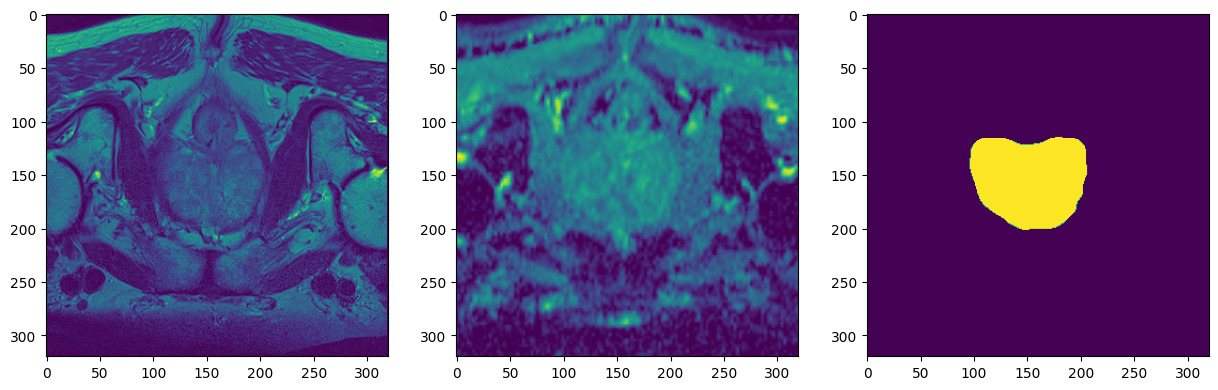

In [16]:
id = random.randint(0, len(train_dataset) - 1)
image, label = train_dataset[id]

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image[..., 0])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(image[..., 1])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(label)

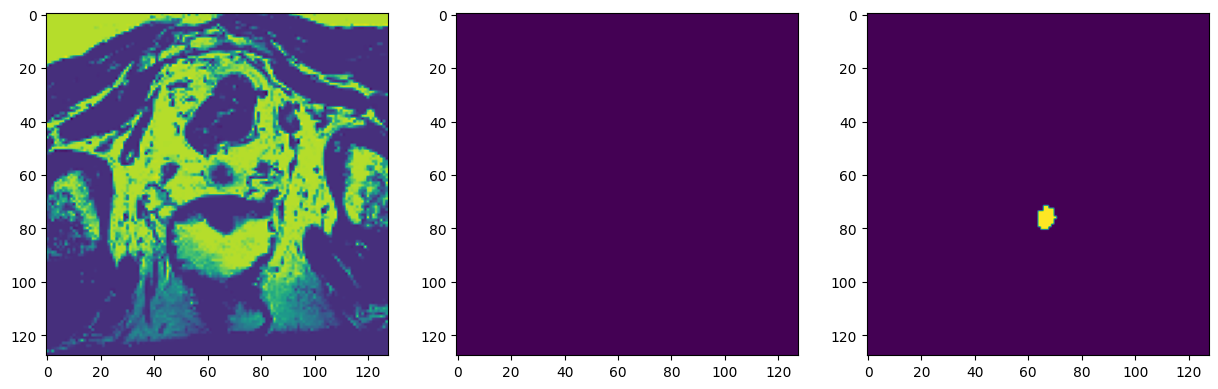

In [31]:
id = random.randint(0, len(train_dataloader) - 1)
images, labels = train_dataloader[id]

image = images[0]
label = labels[0]

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image[..., 0])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(image[..., 1])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(label)

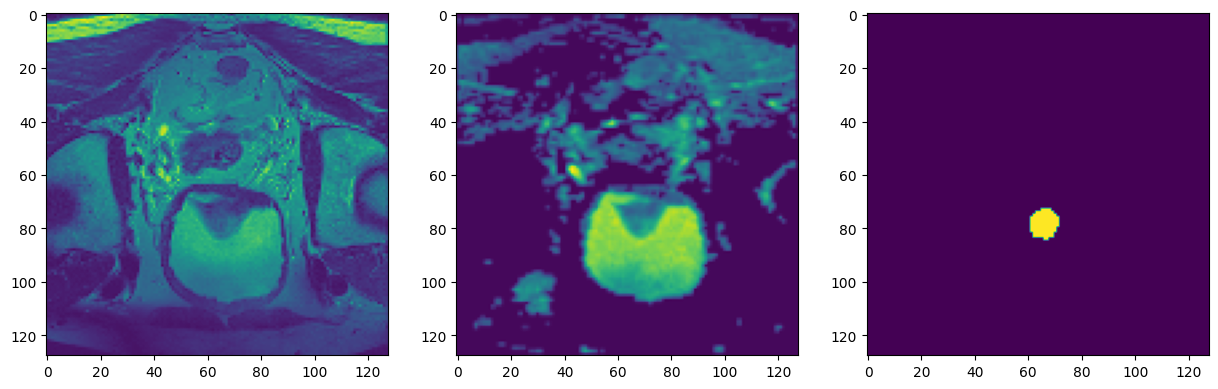

In [18]:
batch_id = random.randint(0, len(val_dataloader) - 1)
images, labels = val_dataloader[batch_id]

sample_id = random.randint(0, len(images) - 1)
image = images[sample_id]
label = labels[sample_id]

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(image[..., 0])
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(image[..., 1])
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(label)